In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv("/Users/tsy/Desktop/google/google_asr/csv/adaptation/test_oneresult_sen_de.csv")
df

,threshold,ave_wer,ave_per,human_wer,human_per,rej_percents
0,0.887,0.095539,0.061869,0.134083,0.100413,0.770882
1,0.888,0.093382,0.060608,0.132206,0.099431,0.776471
2,0.889,0.091324,0.059205,0.130456,0.098338,0.782647
3,0.890,0.089363,0.058174,0.128716,0.097527,0.787059
4,0.891,0.086667,0.056453,0.126387,0.096174,0.794412
5,0.892,0.084118,0.055007,0.124103,0.094993,0.799706
6,0.893,0.082500,0.054021,0.122721,0.094241,0.804412
7,0.894,0.079755,0.052200,0.120270,0.092714,0.810294
8,0.895,0.077206,0.050519,0.118015,0.091328,0.816176
9,0.896,0.075392,0.049058,0.116554,0.090219,0.823235


In [50]:
dfw = pd.read_csv("/Users/tsy/Desktop/google/google_asr/csv/adaptation/test_oneresult_word_de.csv")
dfw

,threshold,ave_wer,ave_per,human_wer,human_per,rej_percents
0,0.805,0.090686,0.060436,0.130377,0.100127,0.793824
1,0.806,0.089265,0.059526,0.129088,0.099350,0.796471
2,0.807,0.087500,0.058408,0.127529,0.098438,0.800588
3,0.808,0.086275,0.057831,0.126451,0.098007,0.803529
4,0.809,0.084167,0.056537,0.124578,0.096949,0.808235
5,0.810,0.082647,0.055573,0.123235,0.096161,0.811765
6,0.811,0.079608,0.053533,0.120520,0.094445,0.818235
7,0.812,0.077157,0.051831,0.118319,0.092993,0.823235
8,0.813,0.075147,0.050666,0.116559,0.092078,0.828235
9,0.814,0.072990,0.049219,0.114681,0.090910,0.833824


In [44]:
dfn = pd.read_csv("/Users/tsy/Desktop/google/google_asr/csv/adaptation/test_nresult_de.csv")
dfn

,threshold,ave_wer,ave_per,human_wer,human_per,rej_percents
0,0.890,0.094118,0.061329,0.132941,0.100152,0.776471
1,0.891,0.091716,0.059751,0.130892,0.098928,0.783529
2,0.892,0.089265,0.058354,0.128691,0.097781,0.788529
3,0.893,0.087941,0.057500,0.127574,0.097132,0.792647
4,0.894,0.085539,0.055926,0.125451,0.095838,0.798235
5,0.895,0.082843,0.054143,0.123064,0.094364,0.804412
6,0.896,0.081029,0.052682,0.121603,0.093255,0.811471
7,0.897,0.078284,0.050824,0.119167,0.091706,0.817647
8,0.898,0.075980,0.049427,0.117157,0.090604,0.823529
9,0.899,0.074216,0.048261,0.115613,0.089658,0.827941


In [14]:
dfo = pd.read_csv("/Users/tsy/Desktop/google/google_asr/csv/adaptation/test_one.csv")
dfnb = pd.read_csv("/Users/tsy/Desktop/google/google_asr/csv/adaptation/test_nbest.csv")

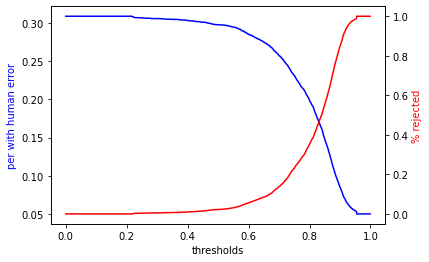

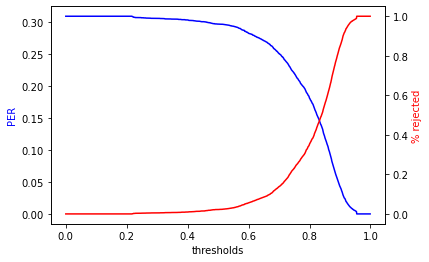

In [105]:
#dfo_per

thresholds = []
rej_percents = []
acc_per = []
ave_per = []
human_per = []
cost = []
threshold = 0
while threshold <= 1:
    thresholds.append(threshold)
    
    # reject percentage
    reject = dfo[dfo['sentence_confidence'] < threshold].shape[0]
    rej_percent = reject / dfo.shape[0]
    rej_percents.append(rej_percent)
    
    accept = dfo[dfo['sentence_confidence'] > threshold]['per'].to_list()
    
    # average accepted WER:
    if len(accept) != 0:
        per_mean = sum(accept) / len(accept)
    acc_per.append(per_mean)
    
    # average overall WER
    allper = sum(accept) / dfo.shape[0]
    ave_per.append(allper)
    
    # overall WER with human errors
    human_error = reject * 0.05
    overallper = (sum(accept) + human_error) / dfo.shape[0]
    human_per.append(overallper)
    
    # overall cost
    costs = 0.1 * reject
    cost.append(costs)
    
    threshold += 0.001

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(thresholds, human_per, color='b')
ax2.plot(thresholds, rej_percents, color='r')

ax1.set_xlabel('thresholds')
ax1.set_ylabel('per with human error', color='b')
ax2.set_ylabel('% rejected', color='r')
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(thresholds, ave_per, color='b')
ax2.plot(thresholds, rej_percents, color='r')

ax1.set_xlabel('thresholds')
ax1.set_ylabel('PER', color='b')
ax2.set_ylabel('% rejected', color='r')
plt.show()

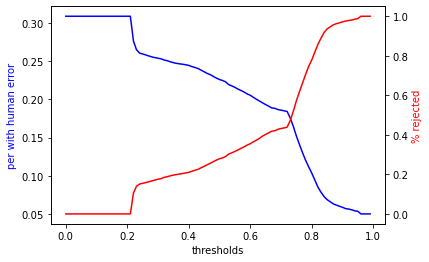

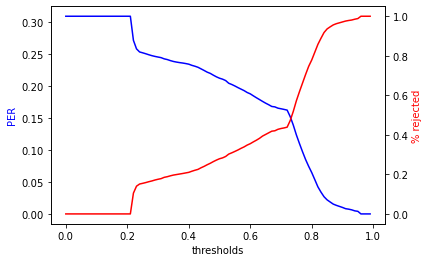

In [100]:
#dfo_word

thresholds = []
rej_percents = []
acc_per = []
ave_per = []
human_per = []
cost = []
threshold = 0
while threshold <= 1:
    thresholds.append(threshold)
    
    # reject percentage
    reject = dfo[dfo['min_word_confidence'] < threshold].shape[0]
    rej_percent = reject / dfo.shape[0]
    rej_percents.append(rej_percent)
    
    accept = dfo[dfo['min_word_confidence'] > threshold]['per'].to_list()
    
    # average accepted WER:
    if len(accept) != 0:
        per_mean = sum(accept) / len(accept)
    acc_per.append(per_mean)
    
    # average overall WER
    allper = sum(accept) / dfo.shape[0]
    ave_per.append(allper)
    
    # overall WER with human errors
    human_error = reject * 0.05
    overallper = (sum(accept) + human_error) / dfo.shape[0]
    human_per.append(overallper)
    
    # overall cost
    costs = 0.1 * reject
    cost.append(costs)
    
    threshold += 0.01

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(thresholds, human_per, color='b')
ax2.plot(thresholds, rej_percents, color='r')

ax1.set_xlabel('thresholds')
ax1.set_ylabel('per with human error', color='b')
ax2.set_ylabel('% rejected', color='r')
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(thresholds, ave_per, color='b')
ax2.plot(thresholds, rej_percents, color='r')

ax1.set_xlabel('thresholds')
ax1.set_ylabel('PER', color='b')
ax2.set_ylabel('% rejected', color='r')
plt.show()

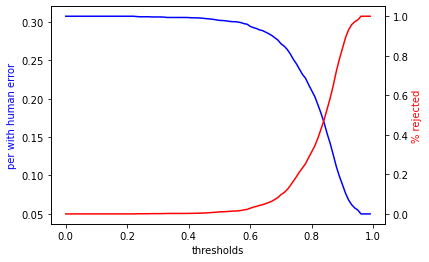

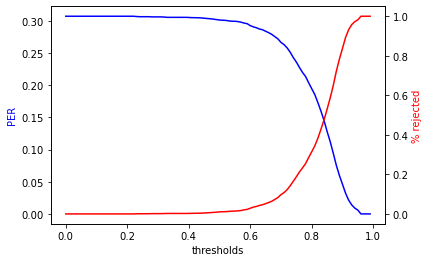

In [101]:
#dfnb_per

thresholds = []
rej_percents = []
acc_per = []
ave_per = []
human_per = []
cost = []
threshold = 0
while threshold <= 1:
    thresholds.append(threshold)
    
    # reject percentage
    reject = dfnb[dfnb['sentence_confidence'] < threshold].shape[0]
    rej_percent = reject / dfnb.shape[0]
    rej_percents.append(rej_percent)
    
    accept = dfnb[dfnb['sentence_confidence'] > threshold]['per'].to_list()
    
    # average accepted WER:
    if len(accept) != 0:
        per_mean = sum(accept) / len(accept)
    acc_per.append(per_mean)
    
    # average overall WER
    allper = sum(accept) / dfnb.shape[0]
    ave_per.append(allper)
    
    # overall WER with human errors
    human_error = reject * 0.05
    overallper = (sum(accept) + human_error) / dfnb.shape[0]
    human_per.append(overallper)
    
    # overall cost
    costs = 0.1 * reject
    cost.append(costs)

    while allper == 0.05:
        print (threshold, rej_percent)
    while overallper == 0.1:
        print (threshold, rej_percent)
    
    threshold += 0.01
    

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(thresholds, human_per, color='b')
ax2.plot(thresholds, rej_percents, color='r')

ax1.set_xlabel('thresholds')
ax1.set_ylabel('per with human error', color='b')
ax2.set_ylabel('% rejected', color='r')
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(thresholds, ave_per, color='b')
ax2.plot(thresholds, rej_percents, color='r')

ax1.set_xlabel('thresholds')
ax1.set_ylabel('PER', color='b')
ax2.set_ylabel('% rejected', color='r')
plt.show()

In [57]:
dfm = pd.read_csv("/Users/tsy/Desktop/google/shilin/csv/adaptation/gender/test_male.csv")
dff = pd.read_csv("/Users/tsy/Desktop/google/shilin/csv/adaptation/gender/test_female.csv")
# dfm.describe()
dff.describe()

,sentence_confidence,min_word_confidence,wer,per
count,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.810423,0.628276,0.466771,0.287740
std,0.107619,0.222992,0.245004,0.175215
min,0.220455,0.216675,0.000000,0.000000
25%,0.764901,0.471992,0.333333,0.176471
50%,0.840922,0.738192,0.500000,0.263158
75%,0.882442,0.792135,0.666667,0.388889
max,0.954677,0.954677,1.166667,1.000000


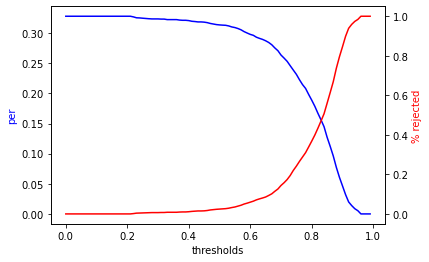

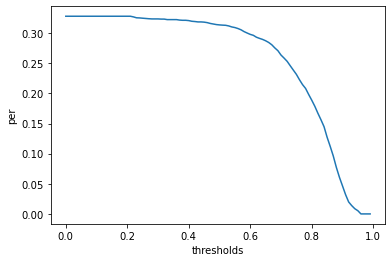

In [71]:
#dfm

thresholds = []
rej_percents = []
acc_per = []
ave_per = []
human_per = []
cost = []
threshold = 0
while threshold <= 1:
    thresholds.append(threshold)
    
    # reject percentage
    reject = dfm[dfm['sentence_confidence'] < threshold].shape[0]
    rej_percent = reject / dfm.shape[0]
    rej_percents.append(rej_percent)
    
    accept = dfm[dfm['sentence_confidence'] > threshold]['per'].to_list()
    
    # average accepted WER:
    if len(accept) != 0:
        per_mean = sum(accept) / len(accept)
    acc_per.append(per_mean)
    
    # average overall WER
    allper = sum(accept) / dfm.shape[0]
    ave_per.append(allper)
    
    # overall WER with human errors
    human_error = reject * 0.05
    overallper = (sum(accept) + human_error) / dfm.shape[0]
    human_per.append(overallper)
    
    # overall cost
    costs = 0.1 * reject
    cost.append(costs)
    
    threshold += 0.01

# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# ax1.plot(thresholds, human_per, color='b')
# ax2.plot(thresholds, rej_percents, color='r')

# ax1.set_xlabel('thresholds')
# ax1.set_ylabel('per with human error', color='b')
# ax2.set_ylabel('% rejected', color='r')
# plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(thresholds, ave_per, color='b')
ax2.plot(thresholds, rej_percents, color='r')

ax1.set_xlabel('thresholds')
ax1.set_ylabel('per', color='b')
ax2.set_ylabel('% rejected', color='r')
plt.show()

plt.plot(thresholds, ave_per)
plt.xlabel('thresholds')
plt.ylabel('per')
plt.show()

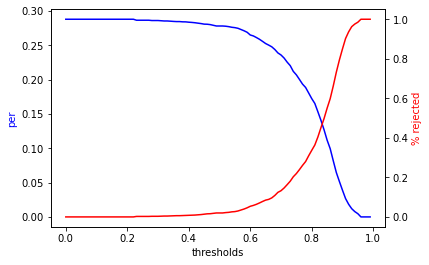

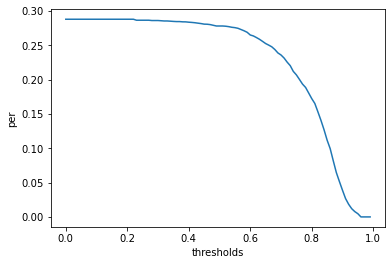

In [70]:
#dff

thresholds = []
rej_percents = []
acc_per = []
ave_per = []
human_per = []
cost = []
threshold = 0
while threshold <= 1:
    thresholds.append(threshold)
    
    # reject percentage
    reject = dff[dff['sentence_confidence'] < threshold].shape[0]
    rej_percent = reject / dff.shape[0]
    rej_percents.append(rej_percent)
    
    accept = dff[dff['sentence_confidence'] > threshold]['per'].to_list()
    
    # average accepted WER:
    if len(accept) != 0:
        per_mean = sum(accept) / len(accept)
    acc_per.append(per_mean)
    
    # average overall WER
    allper = sum(accept) / dff.shape[0]
    ave_per.append(allper)
    
    # overall WER with human errors
    human_error = reject * 0.05
    overallper = (sum(accept) + human_error) / dff.shape[0]
    human_per.append(overallper)
    
    # overall cost
    costs = 0.1 * reject
    cost.append(costs)
    
    threshold += 0.01

# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# ax1.plot(thresholds, human_per, color='b')
# ax2.plot(thresholds, rej_percents, color='r')

# ax1.set_xlabel('thresholds')
# ax1.set_ylabel('per with human error', color='b')
# ax2.set_ylabel('% rejected', color='r')
# plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(thresholds, ave_per, color='b')
ax2.plot(thresholds, rej_percents, color='r')

ax1.set_xlabel('thresholds')
ax1.set_ylabel('per', color='b')
ax2.set_ylabel('% rejected', color='r')
plt.show()

plt.plot(thresholds, ave_per)
plt.xlabel('thresholds')
plt.ylabel('per')
plt.show()


In [144]:
dfmd = pd.read_csv("/Users/tsy/Desktop/google/shilin/csv/adaptation/gender/test_result_male.csv")
dfmd

,threshold,ave_wer,ave_per,human_wer,human_per,rej_percents
0,0.892,0.088889,0.059476,0.128833,0.099421,0.798889
1,0.893,0.086852,0.058212,0.127102,0.098462,0.805000
2,0.894,0.083704,0.056209,0.124259,0.096764,0.811111
3,0.895,0.080093,0.053978,0.121009,0.094894,0.818333
4,0.896,0.078704,0.052760,0.119926,0.093982,0.824444
5,0.897,0.076111,0.051018,0.117611,0.092518,0.830000
6,0.898,0.073148,0.049054,0.115009,0.090915,0.837222
7,0.899,0.070926,0.047614,0.113009,0.089698,0.841667
8,0.900,0.069444,0.046687,0.111694,0.088937,0.845000
9,0.901,0.069259,0.046548,0.111537,0.088826,0.845556


In [146]:
dffd = pd.read_csv("/Users/tsy/Desktop/google/shilin/csv/adaptation/gender/test_result_female.csv")
dffd

,threshold,ave_wer,ave_per,human_wer,human_per,rej_percents
0,0.886,0.093021,0.058386,0.131177,0.096542,0.763125
1,0.887,0.090938,0.056878,0.129406,0.095347,0.769375
2,0.888,0.088333,0.055615,0.127146,0.094427,0.776250
3,0.889,0.086458,0.054330,0.125552,0.093424,0.781875
4,0.890,0.084063,0.053137,0.123438,0.092512,0.787500
5,0.891,0.081250,0.051489,0.120969,0.091208,0.794375
6,0.892,0.078750,0.049980,0.118781,0.090011,0.800625
7,0.893,0.077604,0.049305,0.117792,0.089493,0.803750


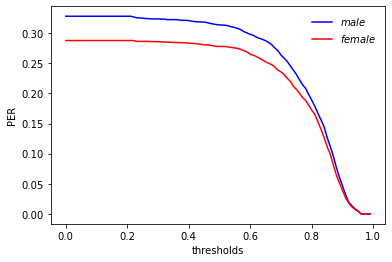

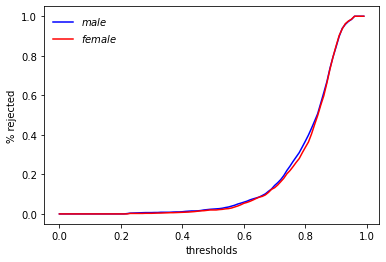

In [147]:
#dfm_dff

thresholds = []
rej_percents = []
acc_per = []
ave_per = []
human_per = []
rej_percents1 = []
acc_per1 = []
ave_per1 = []
human_per1 = []
threshold = 0
while threshold <= 1:
    thresholds.append(threshold)
    
    # reject percentage
    reject = dfm[dfm['sentence_confidence'] < threshold].shape[0]
    rej_percent = reject / dfm.shape[0]
    rej_percents.append(rej_percent)
    
    accept = dfm[dfm['sentence_confidence'] > threshold]['per'].to_list()
    
    reject1 = dff[dff['sentence_confidence'] < threshold].shape[0]
    rej_percent1 = reject1 / dff.shape[0]
    rej_percents1.append(rej_percent1)
    accept1 = dff[dff['sentence_confidence'] > threshold]['per'].to_list()
    
    # average overall WER
    allper = sum(accept) / dfm.shape[0]
    ave_per.append(allper)
    
    allper1 = sum(accept1) / dff.shape[0]
    ave_per1.append(allper1)
    
    # overall WER with human errors
    human_error = reject * 0.05
    overallper = (sum(accept) + human_error) / dfm.shape[0]
    human_per.append(overallper)
    
    human_error1 = reject1 * 0.05
    overallper1 = (sum(accept1) + human_error1) / dff.shape[0]
    human_per1.append(overallper1)
    
    threshold += 0.01


# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# ax1.plot(thresholds, ave_per, color='b')
# ax2.plot(thresholds, rej_percents, color='r')

# ax1.set_xlabel('thresholds')
# ax1.set_ylabel('per', color='b')
# ax2.set_ylabel('% rejected', color='r')
# plt.show()

plt.plot(thresholds, ave_per, color='b', label='$male$') 
hl=plt.legend(loc='upper right', frameon=False)                
plt.plot(thresholds, ave_per1, color='r', label='$female$')
plt.legend(loc='upper right', frameon=False)                

plt.xlabel('thresholds')
plt.ylabel('PER')
plt.show()

plt.plot(thresholds, rej_percents, color='b', label='$male$') 
hl=plt.legend(loc='upper left', frameon=False)                
plt.plot(thresholds, rej_percents1, color='r', label='$female$')
plt.legend(loc='upper left', frameon=False)                

plt.xlabel('thresholds')
plt.ylabel('% rejected')
plt.show()

In [138]:
dfadd = pd.read_csv("/Users/tsy/Desktop/google/shilin/csv/adaptation/test_oneadd_word.csv")
dfadd.describe()

,threshold,ave_wer,ave_per,human_wer,human_per,rej_percents
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.850500,0.077865,0.051325,0.119146,0.092606,0.825613
std,0.086747,0.085886,0.055842,0.076129,0.046086,0.195162
min,0.701000,0.000000,0.000000,0.050000,0.050000,0.432059
25%,0.775750,0.010527,0.007307,0.059479,0.056259,0.680147
50%,0.850500,0.032279,0.022240,0.079022,0.068983,0.934853
75%,0.925250,0.139154,0.091997,0.173162,0.126005,0.979044
max,1.000000,0.253529,0.164413,0.275132,0.186016,1.000000


In [139]:
a=dfadd.loc[dfadd['ave_per'] <= 0.05]
a.describe()
# b=dfadd.loc[dfadd['threshold'] >= 0.75]
# b.describe()

,threshold,ave_wer,ave_per,human_wer,human_per,rej_percents
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.907000,0.018625,0.012688,0.066677,0.060740,0.961046
std,0.054126,0.018745,0.012618,0.016678,0.010554,0.041420
min,0.814000,0.000000,0.000000,0.050000,0.050000,0.833824
25%,0.860500,0.005368,0.003631,0.054831,0.053095,0.946029
50%,0.907000,0.013186,0.009040,0.061877,0.057731,0.973824
75%,0.953500,0.026961,0.018686,0.074262,0.065988,0.989265
max,1.000000,0.072990,0.049219,0.114681,0.090910,1.000000


In [140]:
dfadd1 = pd.read_csv("/Users/tsy/Desktop/google/shilin/csv/adaptation/test_oneadd_sen.csv")
dfadd1.describe()

,threshold,ave_wer,ave_per,human_wer,human_per,rej_percents
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.850500,0.180372,0.115615,0.209885,0.145128,0.590274
std,0.086747,0.141222,0.090043,0.125455,0.074275,0.315586
min,0.701000,0.000000,0.000000,0.050000,0.050000,0.138529
25%,0.775750,0.024583,0.016497,0.071980,0.063894,0.285662
50%,0.850500,0.188039,0.120972,0.215627,0.148560,0.551765
75%,0.925250,0.316434,0.201616,0.330717,0.215899,0.947941
max,1.000000,0.392157,0.250510,0.399083,0.257436,1.000000


In [141]:
c=dfadd1.loc[dfadd1['ave_per'] <= 0.05]
c.describe()
# d=dfadd1.loc[dfadd1['threshold'] >= 0.75]
# d.describe()

,threshold,ave_wer,ave_per,human_wer,human_per,rej_percents
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.948000,0.017450,0.011513,0.065511,0.059574,0.961227
std,0.030455,0.022013,0.014401,0.019487,0.011876,0.050580
min,0.896000,0.000000,0.000000,0.050000,0.050000,0.823235
25%,0.922000,0.000000,0.000000,0.050000,0.050000,0.938824
50%,0.948000,0.008431,0.005732,0.057534,0.054835,0.982059
75%,0.974000,0.028578,0.018874,0.075520,0.065815,1.000000
max,1.000000,0.075392,0.049058,0.116554,0.090219,1.000000


In [135]:
dfadd2 = pd.read_csv("/Users/tsy/Desktop/google/shilin/csv/adaptation/test_nbestadd.csv")
dfadd2.describe()

,threshold,ave_wer,ave_per,human_wer,human_per,rej_percents
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.850500,0.191584,0.123944,0.219932,0.152291,0.566942
std,0.086747,0.149749,0.096574,0.133113,0.079938,0.333013
min,0.701000,0.000000,0.000000,0.050000,0.050000,0.097647
25%,0.775750,0.027059,0.018161,0.074239,0.065341,0.244779
50%,0.850500,0.199559,0.129195,0.225860,0.155496,0.526029
75%,0.925250,0.335931,0.216379,0.348170,0.228618,0.943603
max,1.000000,0.412794,0.266590,0.417676,0.271473,1.000000


In [136]:
e=dfadd2.loc[dfadd2['ave_per'] <= 0.05]
e.describe()
# f=dfadd2.loc[dfadd2['threshold'] >= 0.75]
# f.describe()

,threshold,ave_wer,ave_per,human_wer,human_per,rej_percents
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,0.949000,0.017835,0.011763,0.065888,0.059816,0.961062
std,0.029878,0.022400,0.014629,0.019876,0.012107,0.050536
min,0.898000,0.000000,0.000000,0.050000,0.050000,0.823529
25%,0.923500,0.000000,0.000000,0.050000,0.050000,0.938088
50%,0.949000,0.009363,0.006407,0.058377,0.055422,0.980294
75%,0.974500,0.029632,0.019688,0.076537,0.066592,1.000000
max,1.000000,0.075980,0.049427,0.117157,0.090604,1.000000
